## Setup

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

from IPython import display
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 100

In [35]:
def plotMagnetization(dt, M):
    time_vector = np.array(range(len(M)))*dt
    plt.plot(time_vector, np.array(M)[:,0])
    plt.plot(time_vector, np.array(M)[:,1])
    plt.plot(time_vector, np.array(M)[:,2])
    plt.ylabel("Magnetization")
    plt.xlabel("Time (ms)")
    plt.legend(['Mx', 'My', 'Mz'])
    plt.ylim([np.array(M).min() - 0.1, np.array(M).max() + 0.1])

def animate(i):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, 3)
    if 10*i < 100:
        ax.quiver(0, 0, 0, np.array(M)[10*i,0], np.array(M)[10*i,1], np.array(M)[10*i,2], color='black')
    else:
        ax.quiver(0, 0, 0, np.array(M)[100*i,0], np.array(M)[100*i,1], np.array(M)[100*i,2], color='black')
    ax.quiver(0, 0, 0, 1, 0, 0, color='#FF000099')
    ax.quiver(0, 0, 0, 0, 1, 0, color='#00FF0099')
    ax.quiver(0, 0, 0, 0, 0, 1, color='#0000FF99')

def animateRepeating(i):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, 3)
    if 10*i < 100:
        ax.quiver(0, 0, 0, np.array(M)[10*i,0], np.array(M)[10*i,1], np.array(M)[10*i,2], color='black')
    else:
        ax.quiver(0, 0, 0, np.array(M)[1000*i,0], np.array(M)[1000*i,1], np.array(M)[1000*i,2], color='black')
    ax.quiver(0, 0, 0, 1, 0, 0, color='#FF000099')
    ax.quiver(0, 0, 0, 0, 1, 0, color='#00FF0099')
    ax.quiver(0, 0, 0, 0, 0, 1, color='#0000FF99')

def excitation(M, dt, duration, flip_angle):
    dTheta = np.deg2rad(flip_angle) * dt / duration
    
    A = np.array([
        [1, 0, 0],
        [0, np.cos(dTheta), -np.sin(dTheta)],
        [0, np.sin(dTheta),  np.cos(dTheta)],
    ])

    for _ in range(int(duration/dt)):
        M.append(A @ M[-1])

def relaxation(M, dt, duration):
    A = np.array([
        [np.exp(-dt/T2), 0, 0],
        [0, np.exp(-dt/T2), 0],
        [0, 0, np.exp(-dt/T1)],
    ])

    B = np.array([
        0,
        0,
        1*(1 - np.exp(-dt/T1))
    ])

    for _ in range(int(duration/dt)):
        M.append(A @ M[-1] + B)

## Declaring constants

In [36]:
# Relevant information
M0 = np.array([0, 0, 1])
dt = 0.1    # ms
T1 = 1500   # ms
T2 = 100    # ms

## Question 1

Excitation (ignoring relaxation) by a 90° flip angle B1 pulse along -x with duration 10 ms.

Text(0.5, 1.0, '90° flip angle excitation')

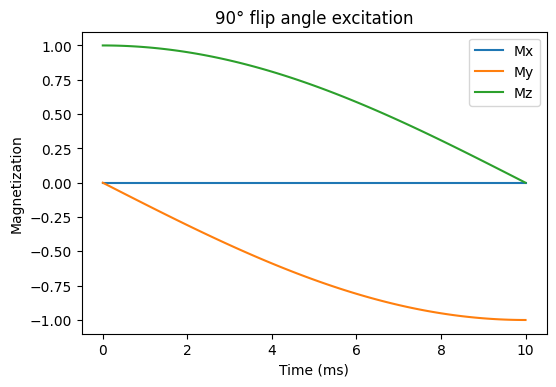

In [37]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Plotting magnetization
plotMagnetization(dt, M)
plt.title("90° flip angle excitation")

## Question 2

Relaxation following the 90° excitation simulated in 1., for an observation period of 
790 ms.

Text(0.5, 1.0, 'Relaxation following the 90° flip angle excitation')

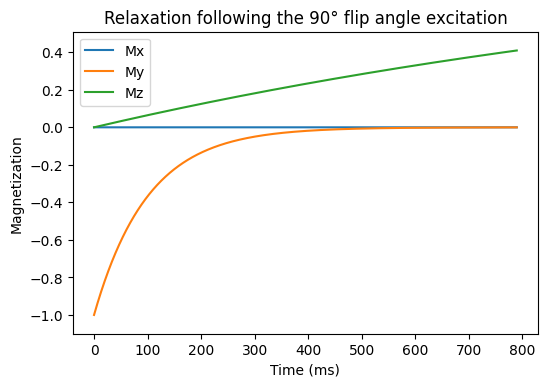

In [38]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Relaxation
relaxation(M, dt, duration = 790)

# Plotting magnetization
plotMagnetization(dt, M[100:])
plt.title("Relaxation following the 90° flip angle excitation")

Try also an observation period of 2990 ms.

Text(0.5, 1.0, 'Relaxation following the 90° flip angle excitation')

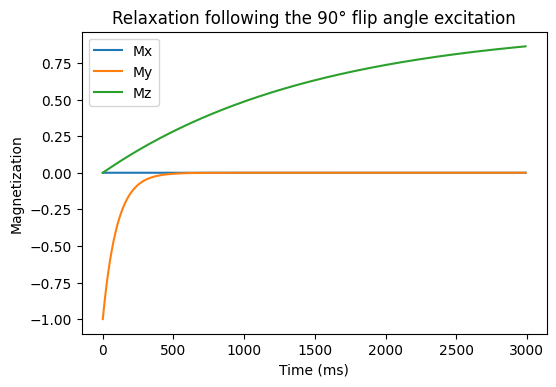

In [39]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Relaxation
relaxation(M, dt, duration = 2990)

# Plotting magnetization
plotMagnetization(dt, M[100:])
plt.title("Relaxation following the 90° flip angle excitation")

In [40]:
fig = plt.figure()

<Figure size 600x400 with 0 Axes>

In [41]:
# Create a figure and axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=300, interval=1)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('magnetization.gif', writer=writer)

### Magnetization vector (Relaxation displayed 10x faster)

![Magnetization](./magnetization.gif)

### Verification of the time constants

It is interesting to note that the different components of the magnetization takes diferent times to return to the original value. Mz takes longer than My, because its time constant is greater. One way to verify the time constant to a step response is by verifying the time at which the curve crossess 63,2% of the final value (1 - e^(-1)).

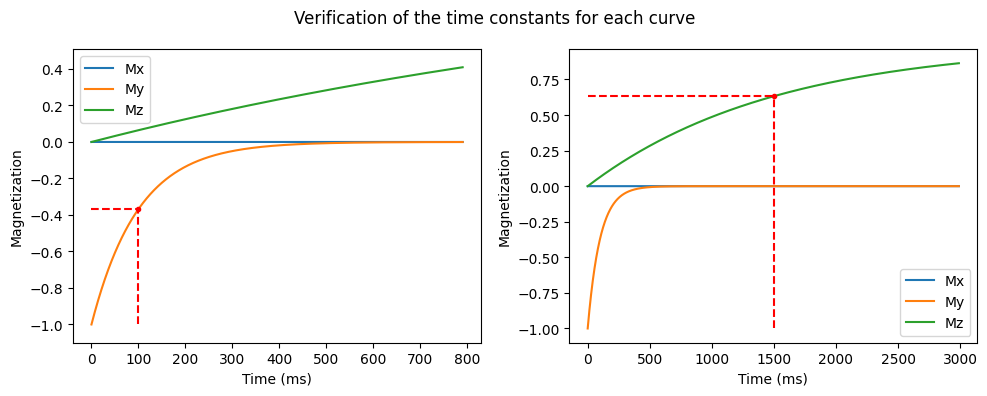

In [42]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Relaxation
relaxation(M, dt, duration = 2990)

# Plotting magnetization
plt.figure(figsize=(10, 4))
plt.subplot(121)
plotMagnetization(dt, M[100:8000])
plt.plot([0, 100], [0.632 - 1, 0.632 - 1], 'r--')
plt.plot([100, 100], [-1, 0.632 - 1], 'r--')
plt.plot([100], [0.632 - 1], 'r.')

plt.subplot(122)
plotMagnetization(dt, M[100:])
plt.plot([0, 1500], [0.632, 0.632], 'r--')
plt.plot([1500, 1500], [-1, 0.632], 'r--')
plt.plot([1500], [0.632], 'r.')
plt.suptitle("Verification of the time constants for each curve")
plt.tight_layout()

## Question 3

Repeat 1. 2. for the flip angles 45º and 180º

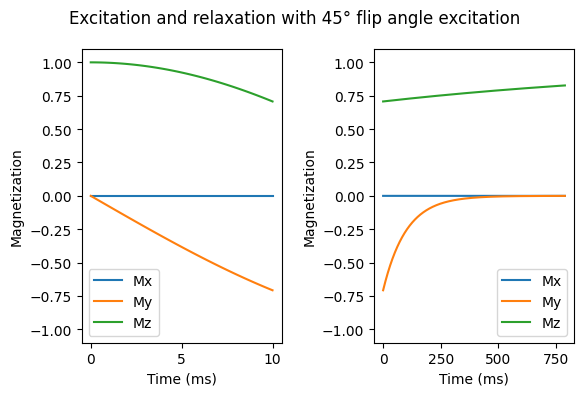

In [43]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 45)

# Plot magnetization
plt.subplot(121)
plotMagnetization(dt, M)
plt.ylim([-1.1, 1.1])

# Relaxation
relaxation(M, dt, duration = 790)

# Plotting magnetization
plt.subplot(122)
plotMagnetization(dt, M[100:])
plt.ylim([-1.1, 1.1])

# Graph configurations
plt.suptitle("Excitation and relaxation with 45° flip angle excitation")
plt.tight_layout()

In [44]:
fig = plt.figure()

<Figure size 600x400 with 0 Axes>

In [45]:
# Create a figure and axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=80, interval=1)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('magnetization45.gif', writer=writer)

### Magnetization vector (Relaxation displayed 10x faster)

![Magnetization](magnetization45.gif)

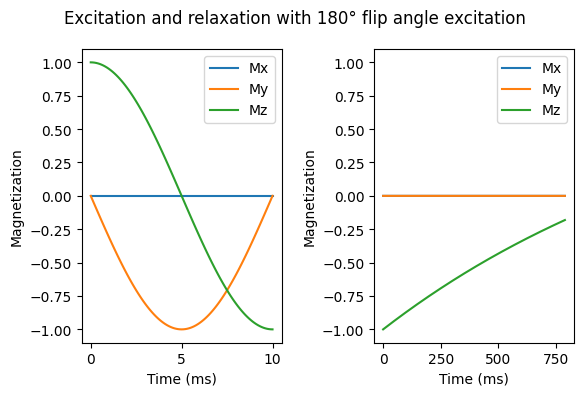

In [46]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 180)

# Plot magnetization
plt.subplot(121)
plotMagnetization(dt, M)

# Relaxation
relaxation(M, dt, duration = 790)

# Plot magnetization
plt.subplot(122)
plotMagnetization(dt, M[100:])
plt.ylim([-1.1, 1.1])

# Graph configurations
plt.suptitle("Excitation and relaxation with 180° flip angle excitation")
plt.tight_layout()

In [47]:
fig = plt.figure()

<Figure size 600x400 with 0 Axes>

In [48]:
# Create a figure and axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=80, interval=1)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('magnetization180.gif', writer=writer)

### Magnetization vector (Relaxation displayed 10x faster)

![Magnetization](./magnetization180.gif)

## Question 4

Now repeat 3. for a flip angle of 45°, over 10 consecutive cycles of excitation and 
relaxation (repetition time (TR) = 800 ms)

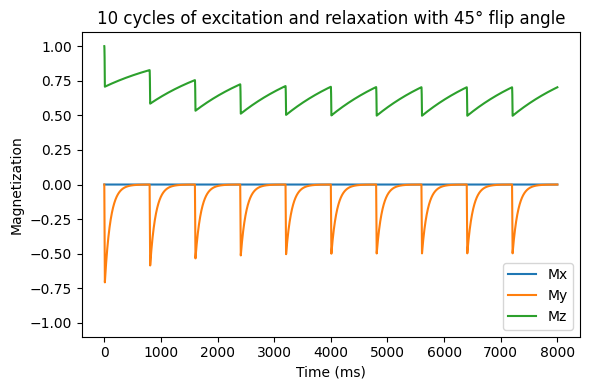

In [49]:
M = [M0]

for _ in range(10):
    # Excitation
    excitation(M, dt, duration = 10, flip_angle = 45)

    # Relaxation
    relaxation(M, dt, duration = 790)

# Plotting magnetization
plotMagnetization(dt, M)
plt.ylim([-1.1, 1.1])

# Graph configurations
plt.title("10 cycles of excitation and relaxation with 45° flip angle")
plt.tight_layout()

In [50]:
fig = plt.figure()

<Figure size 600x400 with 0 Axes>

In [51]:
# Create a figure and axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig, animateRepeating, repeat=True,
                                    frames=80, interval=1)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('magnetizationRepeat.gif', writer=writer)

### Magnetization vector (Relaxation displayed 10x faster)

![Magnetization](./magnetizationRepeat.gif)